In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hongdae = pd.read_csv('../data/hongdae_1220.csv')
hongdae.head()

,년,월,date,day,time,승객유형,승객수,vac
0,2022,6,2022-06-01,일/공휴일,5,외국인,1.0,0
1,2022,6,2022-06-01,일/공휴일,5,우대권,97.0,0
2,2022,6,2022-06-01,일/공휴일,5,일반,1252.0,0
3,2022,6,2022-06-01,일/공휴일,5,청소년,46.0,0
4,2022,6,2022-06-01,일/공휴일,6,외국인,0.0,0


In [3]:
hongdae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58480 entries, 0 to 58479
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년       58480 non-null  int64  
 1   월       58480 non-null  int64  
 2   date    58480 non-null  object 
 3   day     58480 non-null  object 
 4   time    58480 non-null  int64  
 5   승객유형    58480 non-null  object 
 6   승객수     58480 non-null  float64
 7   vac     58480 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.6+ MB


In [4]:
# 피벗 테이블 생성
pivot_df = hongdae.pivot_table(
    values='승객수', 
    index=['년', '월', 'date', 'day', 'time', 'vac'],
    columns='승객유형',
    aggfunc='sum',
    fill_value=0
)

# 인덱스 재설정
pivot_df = pivot_df.reset_index()

# 열 이름 재설정
pivot_df.columns.name = None


In [5]:
pivot_df.head()

,년,월,date,day,time,vac,외국인,우대권,일반,청소년
0,2022,6,2022-06-01,일/공휴일,5,0,1.0,97.0,1252.0,46.0
1,2022,6,2022-06-01,일/공휴일,6,0,0.0,181.0,976.0,40.0
2,2022,6,2022-06-01,일/공휴일,7,0,1.0,125.0,942.0,40.0
3,2022,6,2022-06-01,일/공휴일,8,0,0.0,212.0,1466.0,75.0
4,2022,6,2022-06-01,일/공휴일,9,0,3.0,254.0,2435.0,246.0


In [6]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년       14620 non-null  int64  
 1   월       14620 non-null  int64  
 2   date    14620 non-null  object 
 3   day     14620 non-null  object 
 4   time    14620 non-null  int64  
 5   vac     14620 non-null  int64  
 6   외국인     14620 non-null  float64
 7   우대권     14620 non-null  float64
 8   일반      14620 non-null  float64
 9   청소년     14620 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 1.1+ MB


---
### 일반 분류

**일반 분리 기준**  
- 요일별
- 시간대별
- vac(계절)별

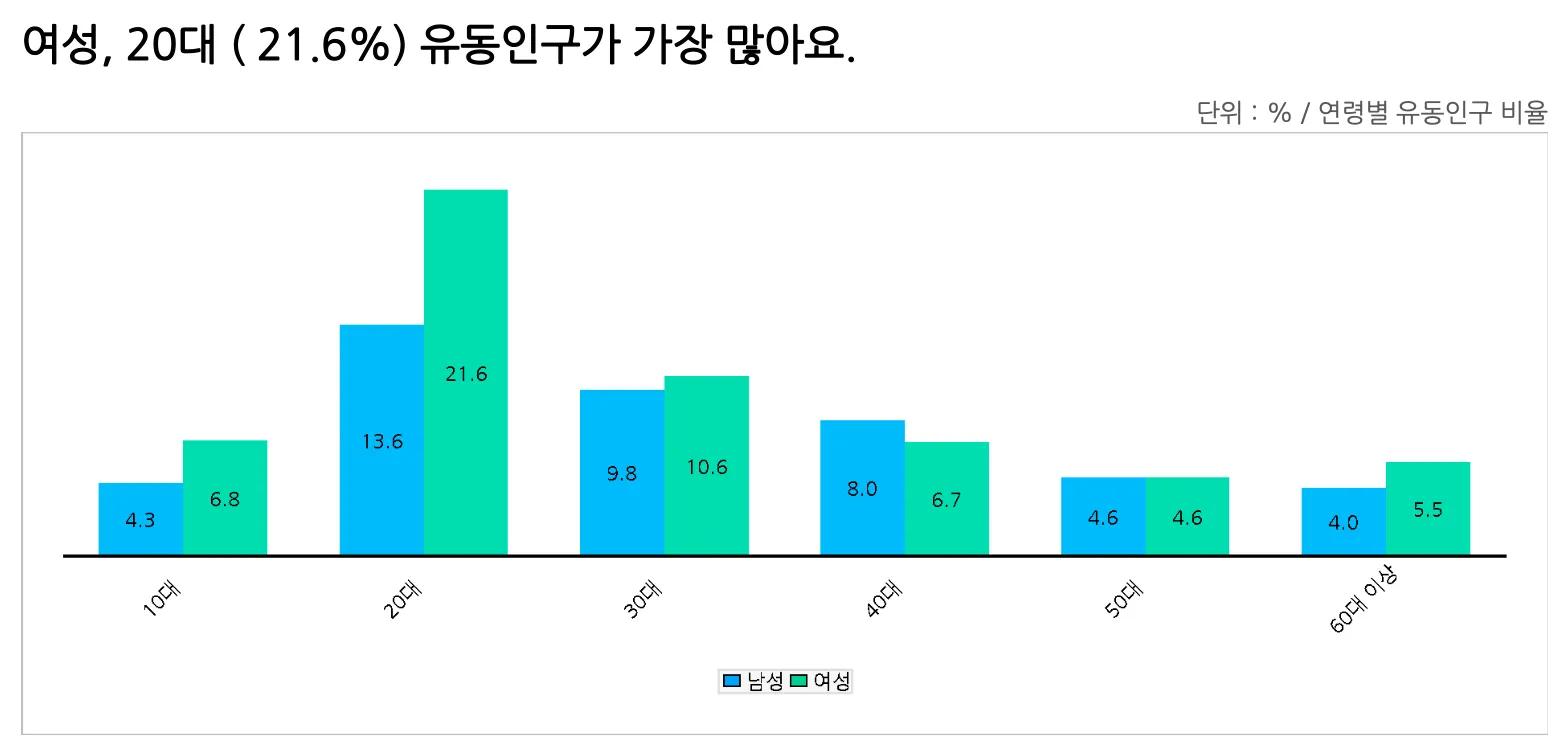

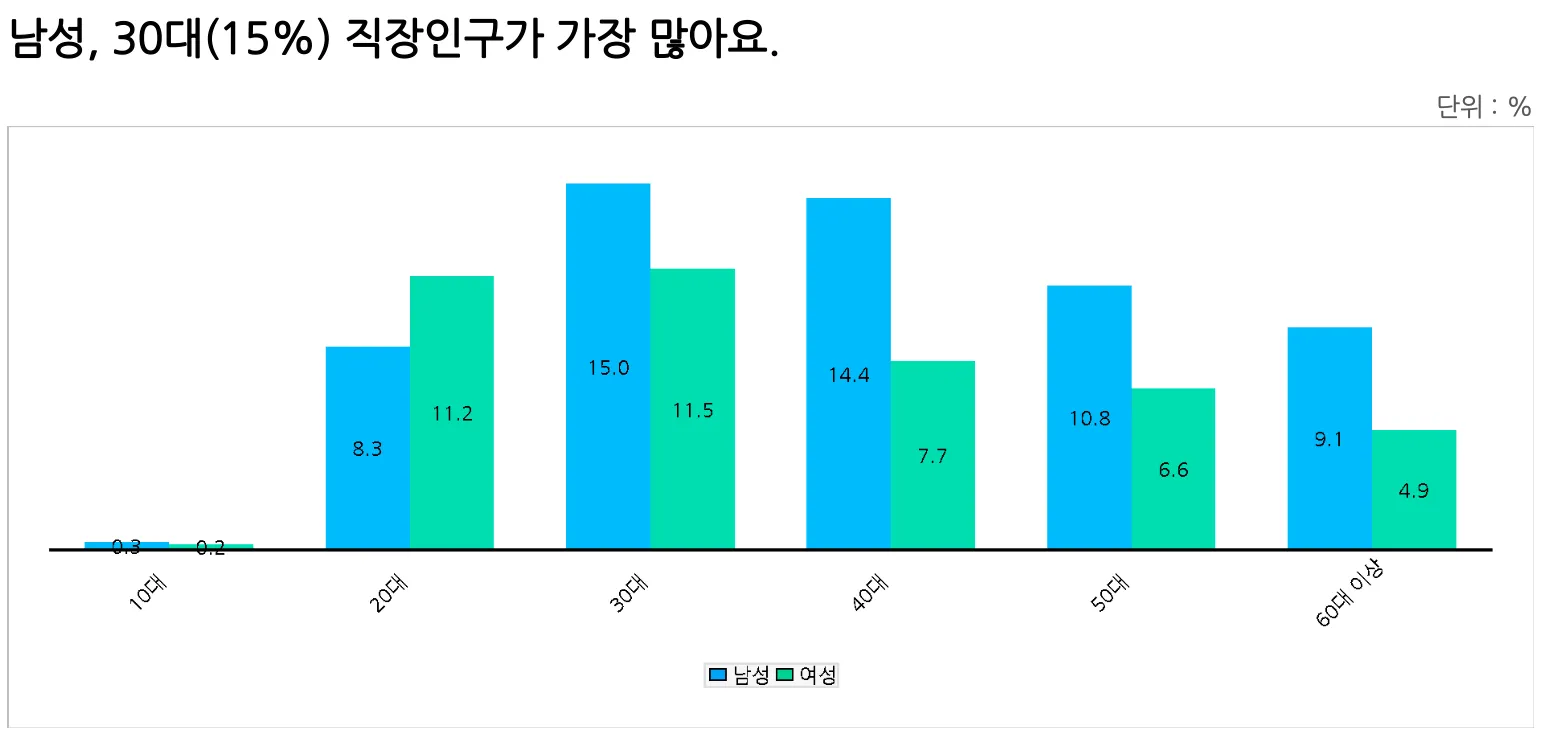

In [7]:
79.5/2

39.75

In [8]:
pivot_df.head(20)

,년,월,date,day,time,vac,외국인,우대권,일반,청소년
0,2022,6,2022-06-01,일/공휴일,5,0,1.0,97.0,1252.0,46.0
1,2022,6,2022-06-01,일/공휴일,6,0,0.0,181.0,976.0,40.0
2,2022,6,2022-06-01,일/공휴일,7,0,1.0,125.0,942.0,40.0
3,2022,6,2022-06-01,일/공휴일,8,0,0.0,212.0,1466.0,75.0
4,2022,6,2022-06-01,일/공휴일,9,0,3.0,254.0,2435.0,246.0
5,2022,6,2022-06-01,일/공휴일,10,0,11.0,308.0,3184.0,383.0
6,2022,6,2022-06-01,일/공휴일,11,0,17.0,348.0,5056.0,958.0
7,2022,6,2022-06-01,일/공휴일,12,0,10.0,346.0,6550.0,1087.0
8,2022,6,2022-06-01,일/공휴일,13,0,6.0,300.0,6966.0,1112.0
9,2022,6,2022-06-01,일/공휴일,14,0,8.0,358.0,7518.0,1340.0


In [9]:
pivot_df.day.unique()

array(['일/공휴일', '평일', '금', '토'], dtype=object)

- 월-목: 0
- 금: 1
- 토: 2
- 일/공휴일: 3

In [10]:
pivot_df['day']=pivot_df['day'].map({'평일':0, '금':1, '토':2, '일/공휴일':3})

In [11]:
pivot_df.tail(20)

,년,월,date,day,time,vac,외국인,우대권,일반,청소년
14600,2024,5,2024-05-31,1,5,0,8.0,179.0,842.0,43.0
14601,2024,5,2024-05-31,1,6,0,10.0,278.0,1518.0,33.0
14602,2024,5,2024-05-31,1,7,0,13.0,327.0,3919.0,147.0
14603,2024,5,2024-05-31,1,8,0,35.0,414.0,7685.0,107.0
14604,2024,5,2024-05-31,1,9,0,29.0,517.0,7006.0,126.0
14605,2024,5,2024-05-31,1,10,0,70.0,524.0,5070.0,144.0
14606,2024,5,2024-05-31,1,11,0,92.0,508.0,5147.0,124.0
14607,2024,5,2024-05-31,1,12,0,86.0,532.0,5821.0,231.0
14608,2024,5,2024-05-31,1,13,0,97.0,534.0,7178.0,291.0
14609,2024,5,2024-05-31,1,14,0,86.0,517.0,6863.0,344.0


In [12]:
print(pivot_df.loc[(pivot_df['vac']==0)&(pivot_df['time']<=10),'일반'].mean())
print(pivot_df.loc[(pivot_df['vac']==1)&(pivot_df['time']<=10),'일반'].mean())

3592.1919398907103
3266.3840877914954


In [13]:
print(pivot_df.loc[(pivot_df['vac']==0)&(pivot_df['time']>10)&(pivot_df['time']<=17),'일반'].mean())
print(pivot_df.loc[(pivot_df['vac']==1)&(pivot_df['time']>10)&(pivot_df['time']<=17),'일반'].mean())

7325.930913348946
6952.660787771899


In [14]:
print(pivot_df.loc[(pivot_df['vac']==0)&(pivot_df['time']>17),'일반'].mean())
print(pivot_df.loc[(pivot_df['vac']==1)&(pivot_df['time']>17),'일반'].mean())

7416.753805620609
7005.252792475015


In [15]:
2220/7000

0.3171428571428571

In [16]:
pivot_df.to_csv('../data/2023_pivot.csv',index=False)

In [17]:
age_ratios = {
    '비방학': {  # vac=0
    '평일': {
        '월화수목': {
            '10이전': {'20': 0.4, '30/40': 0.4, '50': 0.2}, 
            '10-17': {'20': 0.4, '30/40': 0.35, '50': 0.25},
            '17이후': {'20': 0.5, '30/40': 0.3, '50': 0.2}
        },
        '금': {
            '10이전': {'20': 0.4, '30/40': 0.4, '50': 0.2}, 
            '10-17': {'20': 0.4, '30/40': 0.35, '50': 0.25},
            '17이후': {'20': 0.55, '30/40': 0.30, '50': 0.15}
        }
    },
    '주말': {
        '토': {
            '10이전': {'20': 0.6, '30/40': 0.3, '50': 0.1}, 
            '10-17': {'20': 0.6, '30/40': 0.3, '50': 0.1},
            '17이후': {'20': 0.6, '30/40': 0.3, '50': 0.1}
        },
        '일/공휴일': {
            '10이전': {'20': 0.6, '30/40': 0.3, '50': 0.1}, 
            '10-17': {'20': 0.6, '30/40': 0.3, '50': 0.1},
            '17이후': {'20': 0.6, '30/40': 0.3, '50': 0.1}
        }
    }
    },
    '방학': {  # vac=1
    '평일': {
        '월화수목': {
            '10이전': {'20': 0.35, '30/40': 0.44, '50': 0.21}, 
            '10-17': {'20': 0.37, '30/40': 0.37, '50': 0.26},
            '17이후': {'20': 0.47, '30/40': 0.32, '50': 0.21}
        },
        '금': {
            '10이전': {'20': 0.35, '30/40': 0.44, '50': 0.21}, 
            '10-17': {'20': 0.37, '30/40': 0.37, '50': 0.26},
            '17이후': {'20': 0.5, '30/40': 0.3, '50': 0.2}
        }
    },
    '주말': {
        '토': {
            '10이전': {'20': 0.6, '30/40': 0.3, '50': 0.1}, 
            '10-17': {'20': 0.6, '30/40': 0.3, '50': 0.1},
            '17이후': {'20': 0.6, '30/40': 0.3, '50': 0.1}
        },
        '일/공휴일': {
            '10이전': {'20': 0.6, '30/40': 0.3, '50': 0.1}, 
            '10-17': {'20': 0.6, '30/40': 0.3, '50': 0.1},
            '17이후': {'20': 0.6, '30/40': 0.3, '50': 0.1}
        }
    }        
    }
}

In [18]:
def div_age_ratio(row):
    total_normal = row['일반']
    day = row['day']  # 1-3
    time = row['time']  # 시간
    vac = row['vac']  # 0: 비방학, 1: 방학
    
    # 방학/비방학 결정
    period = '방학' if vac == 1 else '비방학'
    
    # 요일 구분
    if day == 0:
        day_type = '평일'
        day_detail = '월화수목'
    elif day == 1:
        day_type = '평일'
        day_detail = '금'
    elif day == 2:
        day_type = '주말'
        day_detail = '토'
    else:  
        day_type = '주말'
        day_detail = '일/공휴일'
    
    # 시간대 구분
    if time <= 10:
        time_slot = '10이전'
    elif time <= 17:
        time_slot = '10-17'
    else:
        time_slot = '17이후'
    
    # 비율 가져오기
    ratios = age_ratios[period][day_type][day_detail][time_slot]
    
    # 연령대별 인원 계산
    age_20 = total_normal * ratios['20']
    age_3040 = total_normal * ratios['30/40']
    age_50 = total_normal * ratios['50']
    
    return age_20, age_3040, age_50

In [19]:
# 데이터프레임에 적용
pivot_df['20대'], pivot_df['30/40대'], pivot_df['50대'] = zip(*pivot_df.apply(div_age_ratio, axis=1))

In [20]:
pivot_df.head(20)

,년,월,date,day,time,vac,외국인,우대권,일반,청소년,20대,30/40대,50대
0,2022,6,2022-06-01,3,5,0,1.0,97.0,1252.0,46.0,751.2,375.6,125.2
1,2022,6,2022-06-01,3,6,0,0.0,181.0,976.0,40.0,585.6,292.8,97.6
2,2022,6,2022-06-01,3,7,0,1.0,125.0,942.0,40.0,565.2,282.6,94.2
3,2022,6,2022-06-01,3,8,0,0.0,212.0,1466.0,75.0,879.6,439.8,146.6
4,2022,6,2022-06-01,3,9,0,3.0,254.0,2435.0,246.0,1461.0,730.5,243.5
5,2022,6,2022-06-01,3,10,0,11.0,308.0,3184.0,383.0,1910.4,955.2,318.4
6,2022,6,2022-06-01,3,11,0,17.0,348.0,5056.0,958.0,3033.6,1516.8,505.6
7,2022,6,2022-06-01,3,12,0,10.0,346.0,6550.0,1087.0,3930.0,1965.0,655.0
8,2022,6,2022-06-01,3,13,0,6.0,300.0,6966.0,1112.0,4179.6,2089.8,696.6
9,2022,6,2022-06-01,3,14,0,8.0,358.0,7518.0,1340.0,4510.8,2255.4,751.8


In [21]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

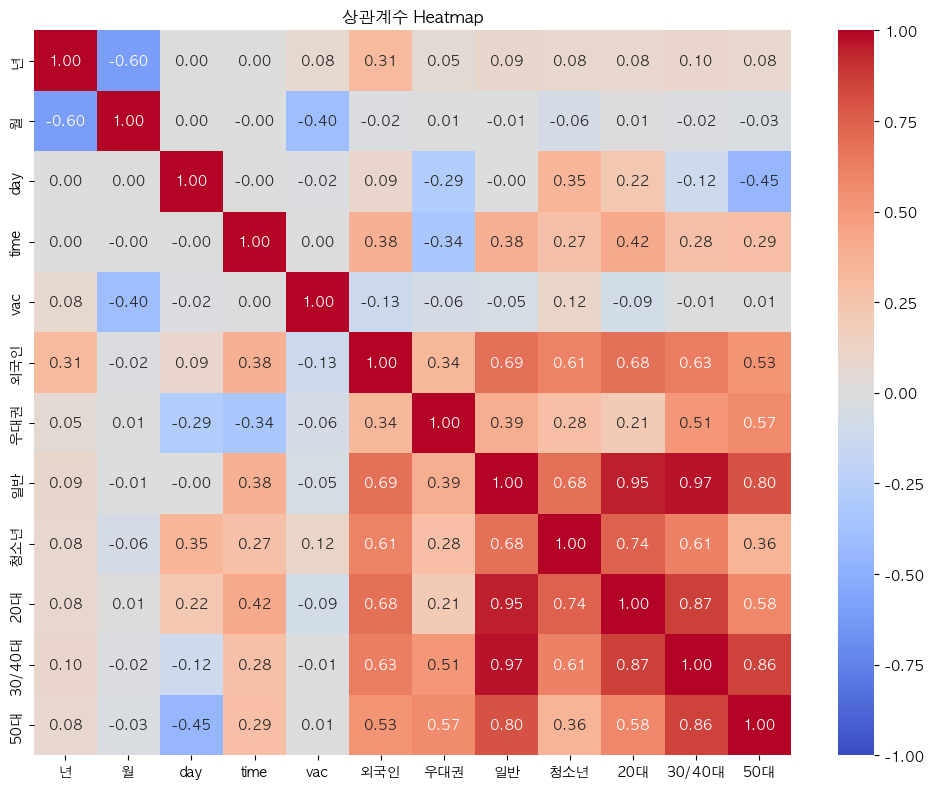

In [22]:
corr_matrix=pivot_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,      # 각 셀에 숫자 표시
            cmap='coolwarm', # 색상 팔레트
            center=0,        # 0을 중심으로 색상 설정
            vmin=-1, 
            vmax=1,
            fmt='.2f')
plt.title('상관계수 Heatmap')
plt.tight_layout()
plt.show()

In [23]:
pivot_df.drop(
    'date',
    axis=1,
    inplace=True
)
pivot_df.head()

,년,월,day,time,vac,외국인,우대권,일반,청소년,20대,30/40대,50대
0,2022,6,3,5,0,1.0,97.0,1252.0,46.0,751.2,375.6,125.2
1,2022,6,3,6,0,0.0,181.0,976.0,40.0,585.6,292.8,97.6
2,2022,6,3,7,0,1.0,125.0,942.0,40.0,565.2,282.6,94.2
3,2022,6,3,8,0,0.0,212.0,1466.0,75.0,879.6,439.8,146.6
4,2022,6,3,9,0,3.0,254.0,2435.0,246.0,1461.0,730.5,243.5


In [24]:
pivot_df.drop(
    '일반',
    axis=1,
    inplace=True
)
pivot_df.head()

,년,월,day,time,vac,외국인,우대권,청소년,20대,30/40대,50대
0,2022,6,3,5,0,1.0,97.0,46.0,751.2,375.6,125.2
1,2022,6,3,6,0,0.0,181.0,40.0,585.6,292.8,97.6
2,2022,6,3,7,0,1.0,125.0,40.0,565.2,282.6,94.2
3,2022,6,3,8,0,0.0,212.0,75.0,879.6,439.8,146.6
4,2022,6,3,9,0,3.0,254.0,246.0,1461.0,730.5,243.5


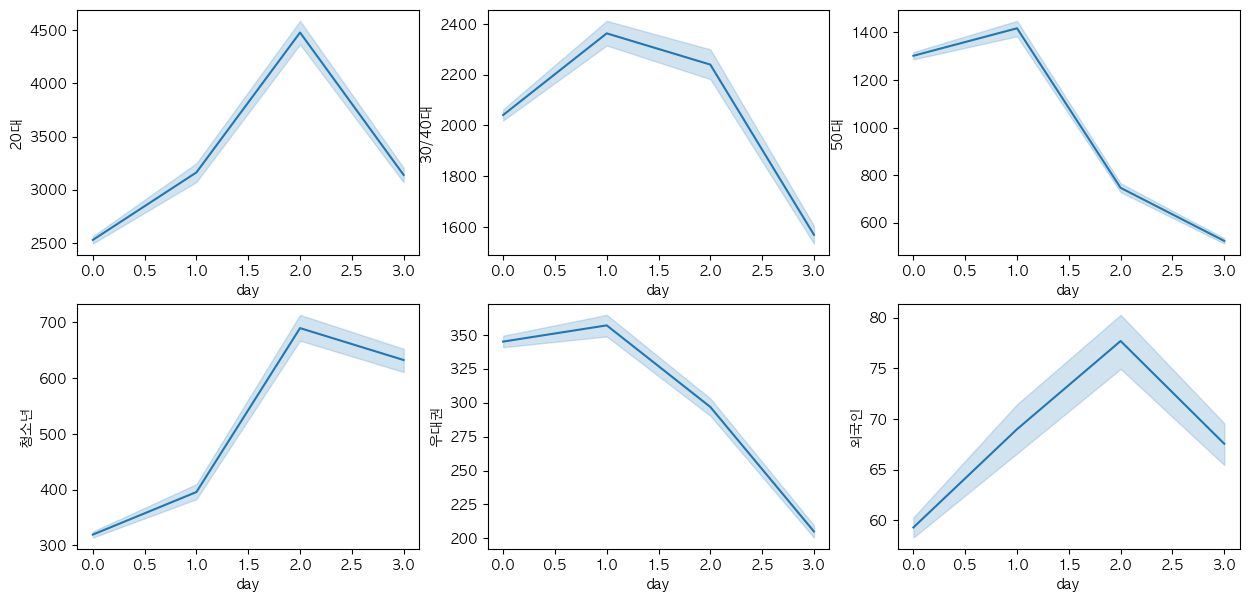

In [25]:
fig=plt.figure(figsize=(15,7))
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)
sns.lineplot(
    x='day',
    y='20대',
    # hue='time',
    data=pivot_df,
    ax=ax1
)
sns.lineplot(
    x='day',
    y='30/40대',
    # hue='time',
    data=pivot_df,
    ax=ax2
)
sns.lineplot(
    x='day',
    y='50대',
    # hue='time',
    data=pivot_df,
    ax=ax3
)
sns.lineplot(
    x='day',
    y='청소년',
    # hue='time',
    data=pivot_df,
    ax=ax4
)
sns.lineplot(
    x='day',
    y='우대권',
    # hue='time',
    data=pivot_df,
    ax=ax5
)
sns.lineplot(
    x='day',
    y='외국인',
    # hue='time',
    data=pivot_df,
    ax=ax6
)
plt.show()

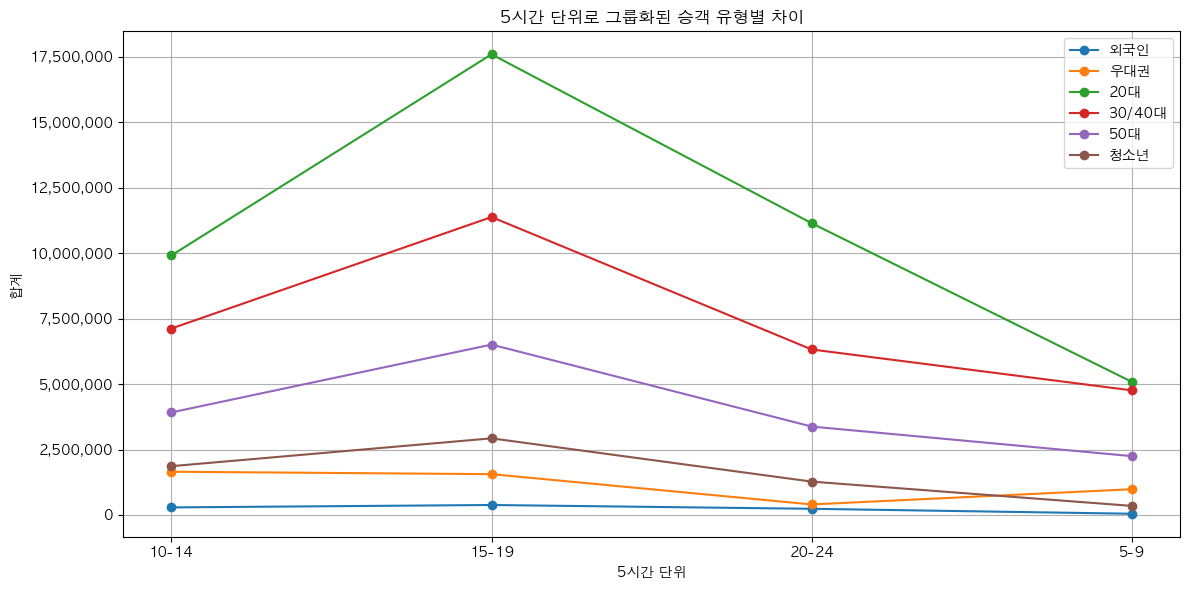

In [26]:
# 5시간 단위 구간을 만드는 함수
def assign_5_hour_interval(hour):
    return f"{(hour // 5) * 5}-{((hour // 5) + 1) * 5 - 1}"

# 시간 구간 컬럼 생성
pivot_df['5_hour_interval'] = pivot_df['time'].apply(assign_5_hour_interval)

# 5시간 단위로 그룹화하여 합계 계산
grouped_df = pivot_df.groupby('5_hour_interval').sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))
columns_to_plot = ['외국인', '우대권', '20대','30/40대','50대', '청소년']

for column in columns_to_plot:
    plt.plot(grouped_df.index, grouped_df[column], label=column, marker='o')

plt.title('5시간 단위로 그룹화된 승객 유형별 차이')
plt.xlabel('5시간 단위')
plt.ylabel('합계')
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.show()

In [27]:
pivot_df.head()

,년,월,day,time,vac,외국인,우대권,청소년,20대,30/40대,50대,5_hour_interval
0,2022,6,3,5,0,1.0,97.0,46.0,751.2,375.6,125.2,5-9
1,2022,6,3,6,0,0.0,181.0,40.0,585.6,292.8,97.6,5-9
2,2022,6,3,7,0,1.0,125.0,40.0,565.2,282.6,94.2,5-9
3,2022,6,3,8,0,0.0,212.0,75.0,879.6,439.8,146.6,5-9
4,2022,6,3,9,0,3.0,254.0,246.0,1461.0,730.5,243.5,5-9


In [28]:
hongdae_sort=pivot_df.drop(
    '5_hour_interval',
    axis=1
)
hongdae_sort.head()

,년,월,day,time,vac,외국인,우대권,청소년,20대,30/40대,50대
0,2022,6,3,5,0,1.0,97.0,46.0,751.2,375.6,125.2
1,2022,6,3,6,0,0.0,181.0,40.0,585.6,292.8,97.6
2,2022,6,3,7,0,1.0,125.0,40.0,565.2,282.6,94.2
3,2022,6,3,8,0,0.0,212.0,75.0,879.6,439.8,146.6
4,2022,6,3,9,0,3.0,254.0,246.0,1461.0,730.5,243.5


In [29]:
hongdae_sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년       14620 non-null  int64  
 1   월       14620 non-null  int64  
 2   day     14620 non-null  int64  
 3   time    14620 non-null  int64  
 4   vac     14620 non-null  int64  
 5   외국인     14620 non-null  float64
 6   우대권     14620 non-null  float64
 7   청소년     14620 non-null  float64
 8   20대     14620 non-null  float64
 9   30/40대  14620 non-null  float64
 10  50대     14620 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 1.2 MB


In [30]:
hongdae_sort.to_csv('../data/1223_hongdae.csv',index=False)

In [31]:
from sklearn.model_selection import train_test_split

### MultiOutputRegressor 사용 가능 모델
- SVR (Support Vector Regressor)4
- RandomForestRegressor3
- LinearRegression6
- Lasso7

In [32]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression  # 선형 회귀
from sklearn.linear_model import Lasso  # 라쏘 회귀

In [33]:
hong_x=hongdae_sort[['년','월','day','time','vac']]
hong_y=hongdae_sort[['외국인', '우대권', '청소년', '20대', '30/40대', '50대']]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    hong_x, 
    hong_y, 
    test_size=0.2, 
    random_state=42
)

In [35]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)

rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.9428123077529603

In [36]:
rf.score(X_test,y_test)

0.9232779207574677

In [37]:
print('Train score:',rf.score(X_train,y_train))
print('Test score:',rf.score(X_test,y_test))

Train score: 0.9428123077529603
Test score: 0.9232779207574677


In [38]:
from sklearn.metrics import r2_score
import numpy as np

# DataFrame을 numpy array로 변환
y_test_array = y_test.values
y_pred = rf.predict(X_test)
y_pred_array = y_pred

# 각 타겟별 R2 점수 계산
for i in range(y_test_array.shape[1]):
    score = r2_score(y_test_array[:, i], y_pred_array[:, i])
    print(f'Target {i+1} ({y_test.columns[i]}) R2 score: {score}')


Target 1 (외국인) R2 score: 0.8210312401600433
Target 2 (우대권) R2 score: 0.9651924891349057
Target 3 (청소년) R2 score: 0.8326899216082062
Target 4 (20대) R2 score: 0.9723906541098724
Target 5 (30/40대) R2 score: 0.9695693242038561
Target 6 (50대) R2 score: 0.9787938953279222


In [39]:
# 선형 회귀
linear_model = MultiOutputRegressor(LinearRegression())

# 라쏘 회귀
lasso_model = MultiOutputRegressor(Lasso(alpha=1.0))



# 모델 학습
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=Lasso())

In [40]:
# 서포트 벡터 회귀
svr_model = MultiOutputRegressor(SVR())
svr_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR())

In [41]:
print('linear train_score:',linear_model.score(X_train,y_train))
print('linear test_score:',linear_model.score(X_test,y_test))
print()
print('lasso train_score:',lasso_model.score(X_train,y_train))
print('lasso test_score:',lasso_model.score(X_test,y_test))
print()
print('svr train_score:',svr_model.score(X_train,y_train))
print('svr test_score:',svr_model.score(X_test,y_test))

linear train_score: 0.22818481342886168
linear test_score: 0.21489703670757118

lasso train_score: 0.22762082485044366
lasso test_score: 0.21388872180022064

svr train_score: -0.01931858091689098
svr test_score: -0.02068963780156106


In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor

In [43]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

# Gaussian Process
gpr_model = GaussianProcessRegressor(random_state=42)

# K-Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)

# Extra Trees
et_model = ExtraTreesRegressor(random_state=42)

In [44]:
# 테스트할 데이터 생성
test_data = {
    '년': [2024],
    '월': [12],
    'day': [0],  # 월요일
    'time': [21],  # 17시
    'vac': [0]  # 비방학
}

# DataFrame으로 변환
test_df = pd.DataFrame(test_data)

# 예측 수행
predictions = rf.predict(test_df)

# 결과 출력
print("예측 결과:")
target_names = ['외국인', '우대권', '청소년', '20대', '30/40대', '50대']
for i, target in enumerate(target_names):
    print(f"{target}: {predictions[0][i]:.2f}")

예측 결과:
외국인: 104.60
우대권: 191.96
청소년: 436.39
20대: 4093.12
30/40대: 2455.87
50대: 1637.25


In [45]:
dt_model.fit(X_train, y_train)
dt_model.score(X_train,y_train)

0.9430031628130898

In [47]:
print('Train score:',dt_model.score(X_train,y_train))
print('Test score:',dt_model.score(X_test,y_test))

Train score: 0.9430031628130898
Test score: 0.9209933699078231


In [50]:
gb_multi=MultiOutputRegressor(gb_model)

In [51]:
gb_multi.fit(X_train,y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=42))

In [52]:
print('Train score:',gb_multi.score(X_train,y_train))
print('Test score:',gb_multi.score(X_test,y_test))

Train score: 0.9146859435340802
Test score: 0.9175981881776379


In [53]:
gpr_model.fit(X_train,y_train)

GaussianProcessRegressor(random_state=42)

In [54]:
print('Train score:',gpr_model.score(X_train,y_train))
print('Test score:',gpr_model.score(X_test,y_test))

Train score: 0.943003162768577
Test score: 0.9209760222294964


In [55]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor()

In [56]:
print('Train score:',knn_model.score(X_train,y_train))
print('Test score:',knn_model.score(X_test,y_test))

Train score: 0.9290377473550988
Test score: 0.9078547377281613


In [57]:
et_model.fit(X_train,y_train)

ExtraTreesRegressor(random_state=42)

In [58]:
print('Train score:',et_model.score(X_train,y_train))
print('Test score:',et_model.score(X_test,y_test))

Train score: 0.9430031628130898
Test score: 0.9210016280374426


In [60]:
y_pred = dt_model.predict(X_test)
y_pred_array = y_pred

# 각 타겟별 R2 점수 계산
for i in range(y_test_array.shape[1]):
    score = r2_score(y_test_array[:, i], y_pred_array[:, i])
    print(f'Target {i+1} ({y_test.columns[i]}) R2 score: {score}')

Target 1 (외국인) R2 score: 0.8144950896988523
Target 2 (우대권) R2 score: 0.9642756076381922
Target 3 (청소년) R2 score: 0.8286368893058293
Target 4 (20대) R2 score: 0.9714761750109497
Target 5 (30/40대) R2 score: 0.9687098183170514
Target 6 (50대) R2 score: 0.978366639476063


In [61]:
y_pred = knn_model.predict(X_test)
y_pred_array = y_pred

# 각 타겟별 R2 점수 계산
for i in range(y_test_array.shape[1]):
    score = r2_score(y_test_array[:, i], y_pred_array[:, i])
    print(f'({y_test.columns[i]}) R2 score: {score}')

(외국인) R2 score: 0.8130375885258913
(우대권) R2 score: 0.9595881983196198
(청소년) R2 score: 0.8304668647621382
(20대) R2 score: 0.9417090953988875
(30/40대) R2 score: 0.9459827462486277
(50대) R2 score: 0.9563439331138035


In [62]:
y_pred = et_model.predict(X_test)
y_pred_array = y_pred

# 각 타겟별 R2 점수 계산
for i in range(y_test_array.shape[1]):
    score = r2_score(y_test_array[:, i], y_pred_array[:, i])
    print(f'({y_test.columns[i]}) R2 score: {score}')

(외국인) R2 score: 0.8144576288920731
(우대권) R2 score: 0.9642935129804627
(청소년) R2 score: 0.8286667905561291
(20대) R2 score: 0.971495735754053
(30/40대) R2 score: 0.9687253230650782
(50대) R2 score: 0.9783707769768599


In [63]:
y_pred = gpr_model.predict(X_test)
y_pred_array = y_pred

# 각 타겟별 R2 점수 계산
for i in range(y_test_array.shape[1]):
    score = r2_score(y_test_array[:, i], y_pred_array[:, i])
    print(f'({y_test.columns[i]}) R2 score: {score}')

(외국인) R2 score: 0.8144576062490287
(우대권) R2 score: 0.9639524707353725
(청소년) R2 score: 0.8288630588620381
(20대) R2 score: 0.9714896089521259
(30/40대) R2 score: 0.9687232724176571
(50대) R2 score: 0.9783701161607534


In [64]:
y_pred = gb_multi.predict(X_test)
y_pred_array = y_pred

# 각 타겟별 R2 점수 계산
for i in range(y_test_array.shape[1]):
    score = r2_score(y_test_array[:, i], y_pred_array[:, i])
    print(f'({y_test.columns[i]}) R2 score: {score}')

(외국인) R2 score: 0.8430772554373843
(우대권) R2 score: 0.9648801010881385
(청소년) R2 score: 0.8490693061047271
(20대) R2 score: 0.93879834480873
(30/40대) R2 score: 0.9424047252628406
(50대) R2 score: 0.9673593963640078


> 외국인과 청소년은 gradient boosting, 나머지는 random forest의 예측력이 가장 좋았다.

In [65]:
import joblib
from joblib import dump, load

# 모델 저장
dump(rf, 'random_forest.joblib')
dump(gb_multi, 'gradient_boosting.joblib')

['gradient_boosting.joblib']